In [1]:
import pandas as pd
import numpy as np
import keras
import itertools
from matplotlib import pyplot as plt

np.random.seed(2)

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout



In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


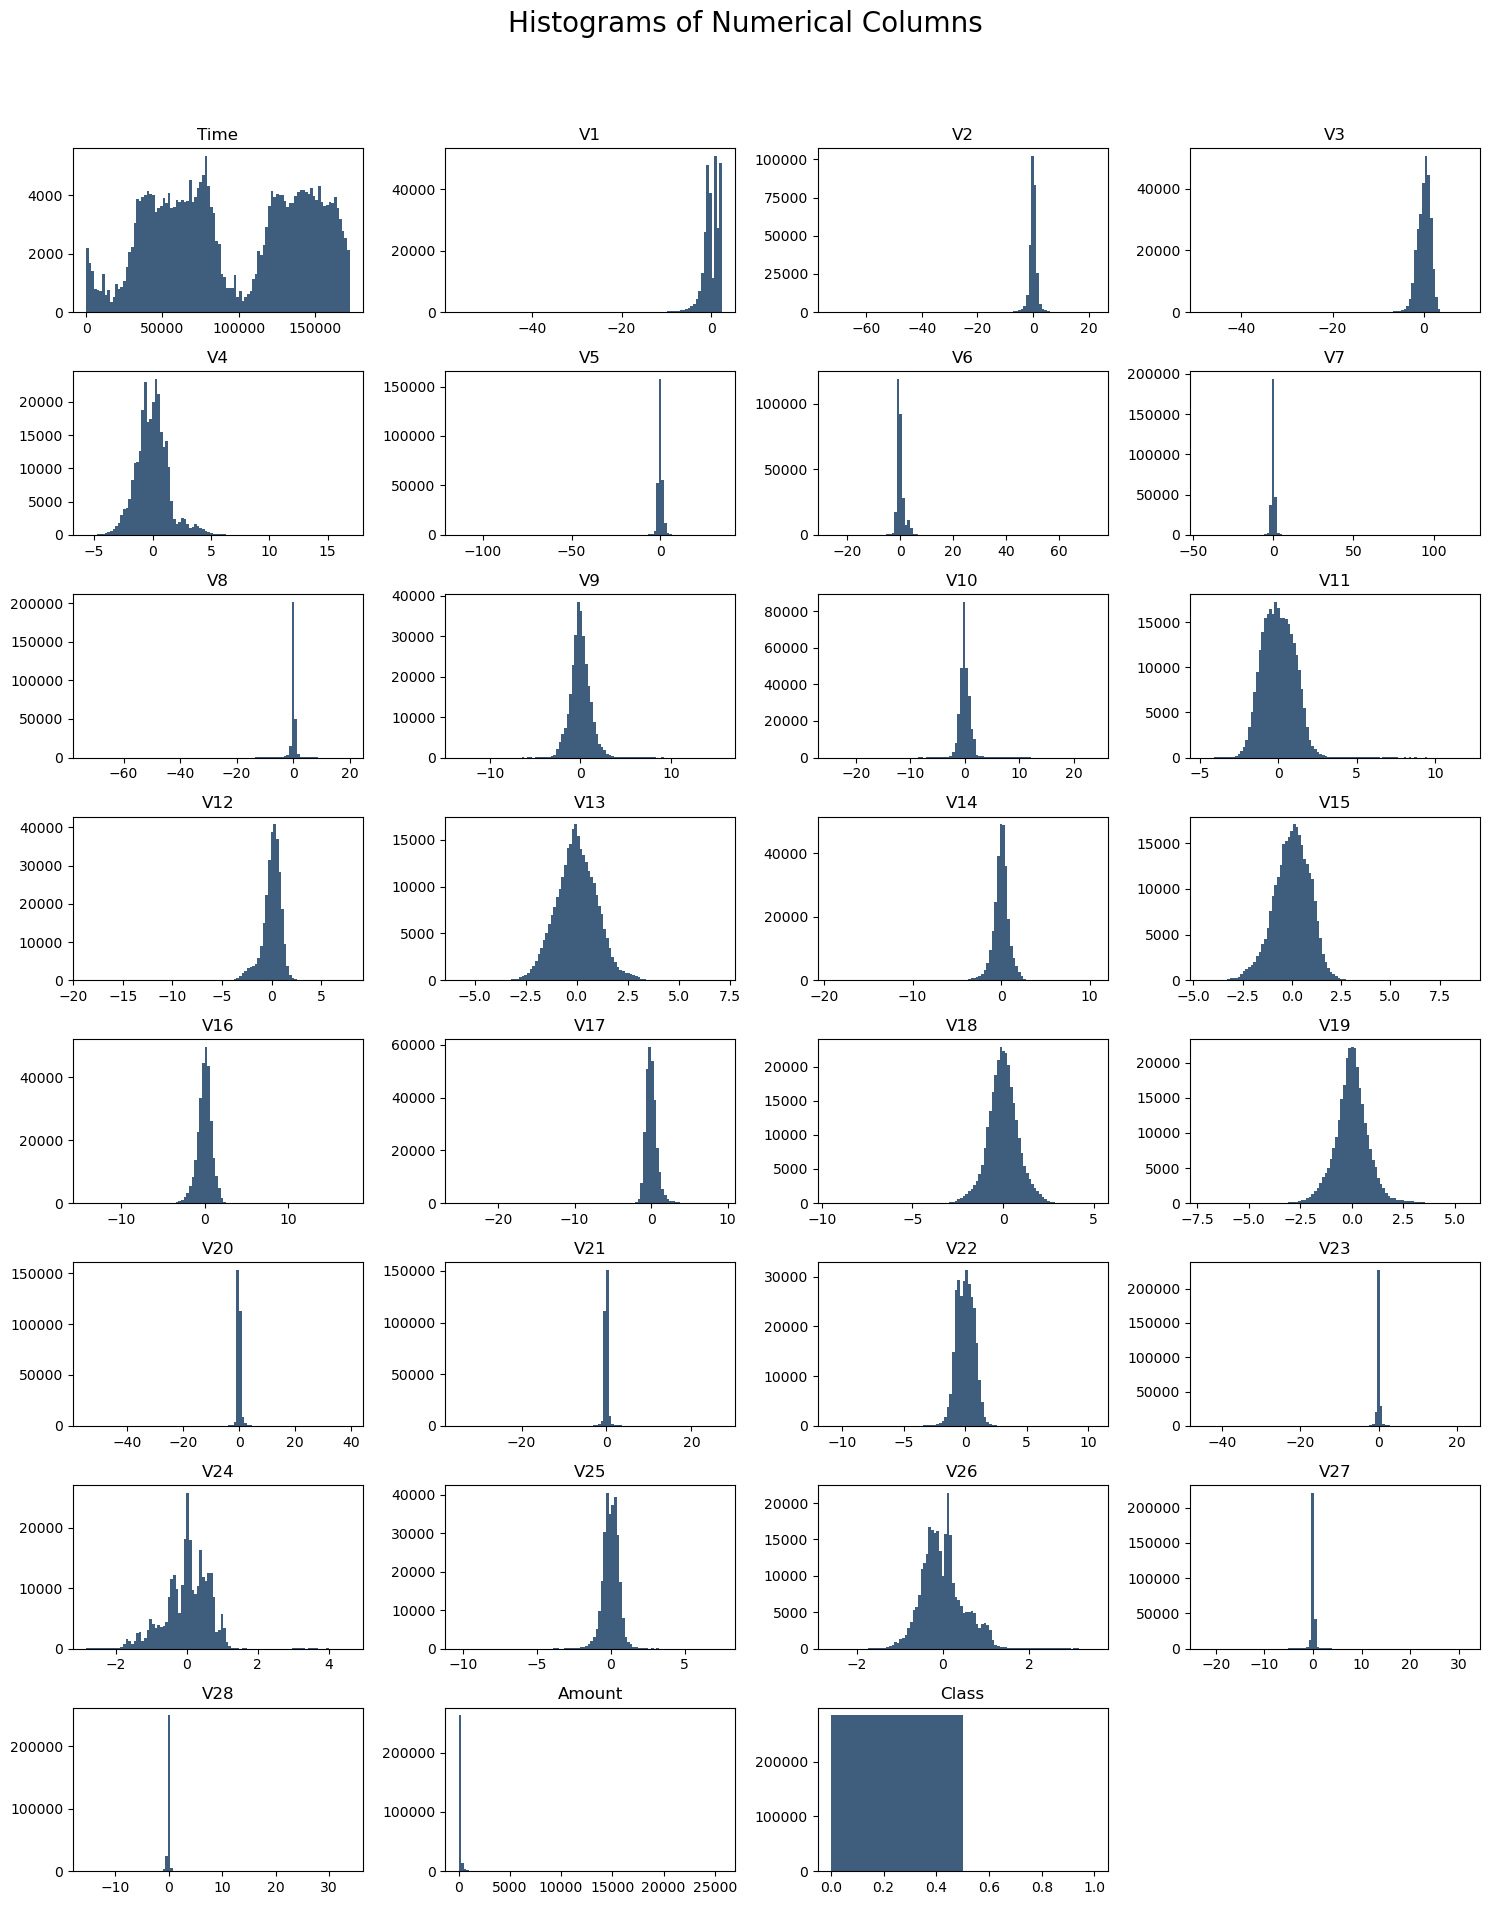

In [7]:


## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(data.columns.values[i])

    vals = np.size(data.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(data.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



##### we can observe a large prevalence of Class 0 (non fraudulent).

In [8]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(data[data.Class==1]), len(data[data.Class==1])/len(data)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


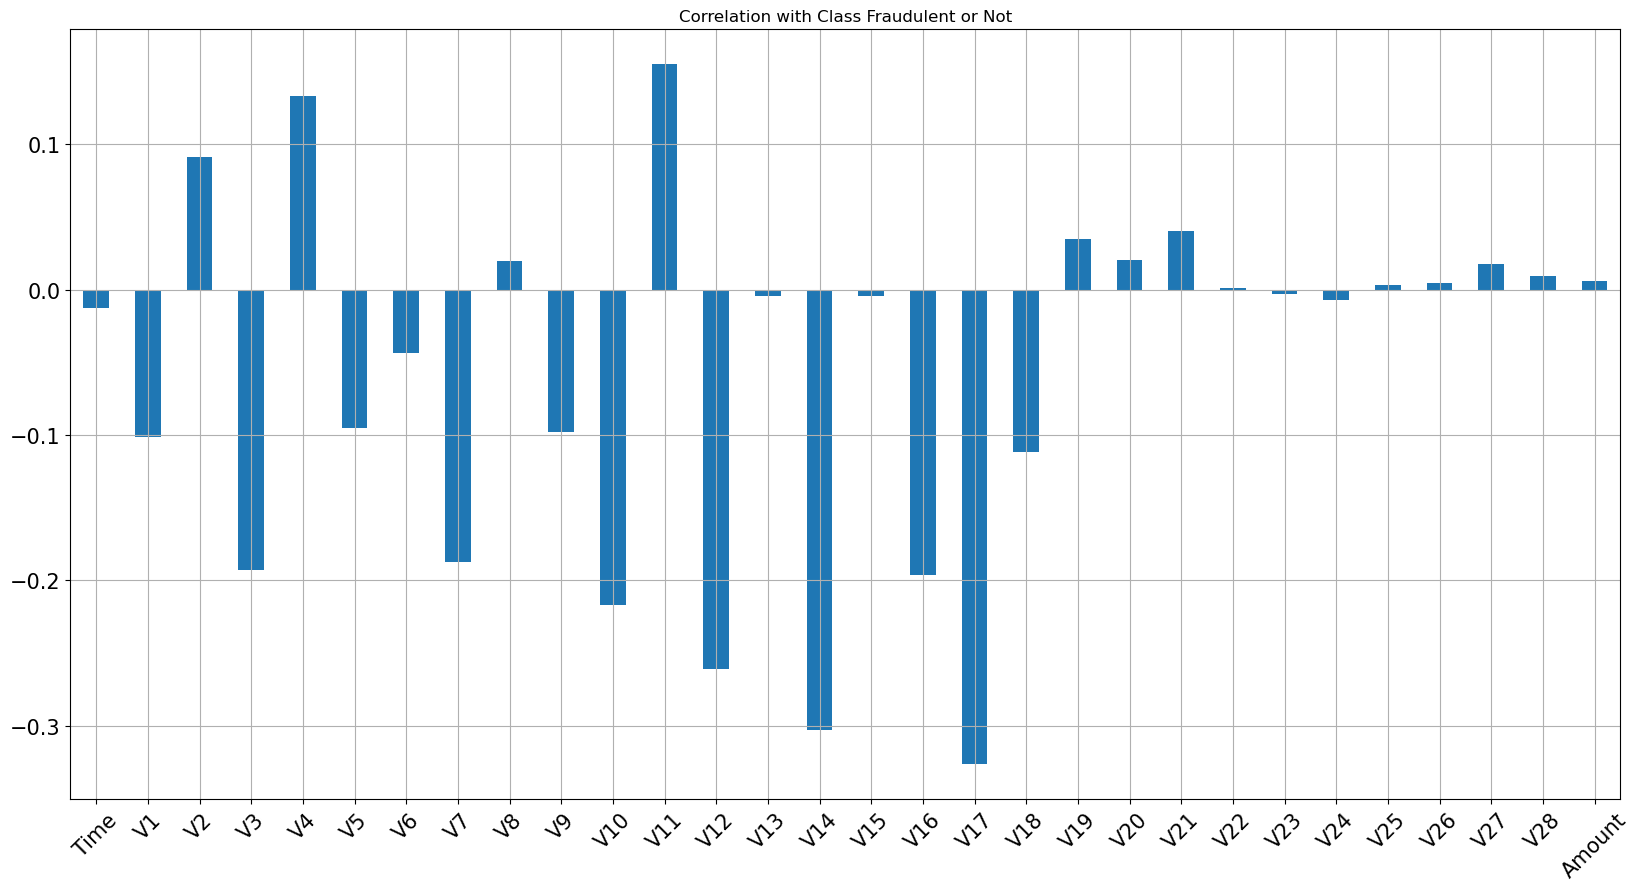

In [9]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = data.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [10]:

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))  # Normalize 'Amount' in [-1,+1] range
data = data.drop(['Amount'],axis=1)

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [12]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']  # Response variable determining if fraudulent or not


In [14]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [16]:
X_train.shape

(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [18]:
y_train.shape

(199364, 1)

In [19]:
y_test.shape

(85443, 1)

#### Random forest 

In [20]:
random_forest = RandomForestClassifier(n_estimators=100)
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [21]:
y_pred = random_forest.predict(X_test)

In [22]:
random_forest.score(X_test,y_test)

0.9996488887328394

In [23]:
# Approach to plot confusion matrix (from scikit-learn.org site)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[85299     8]
 [   22   114]]


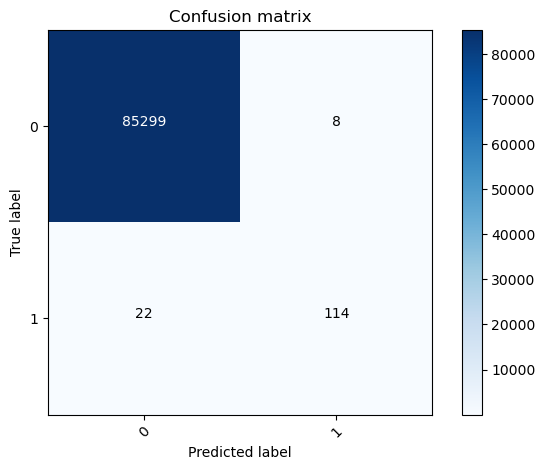

In [24]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [25]:

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9996 	precision:0.9344 	recall:0.8382 	F1-score:0.8837


In [26]:
### Store results in dataframe for comparing various Models
results_testset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721


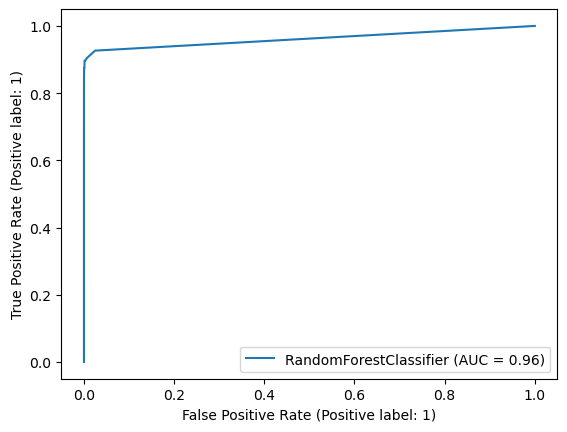

In [27]:
ROC_RF = RocCurveDisplay.from_estimator(random_forest, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284307      8]
 [    22    470]]


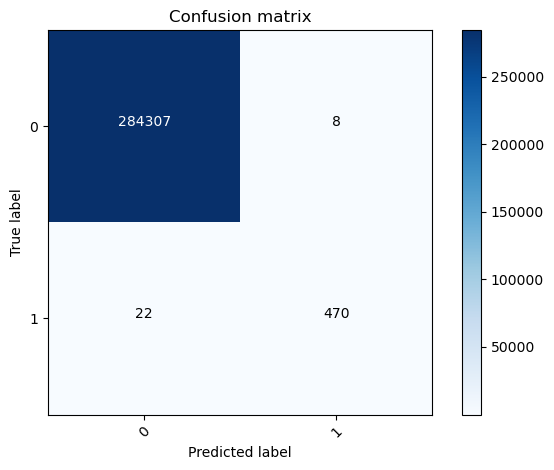

In [28]:
# Confusion matrix on the whole dataset
y_pred = random_forest.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [29]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print('accuracy:%0.4f'%acc,'\tprecision:%0.4f'%prec,'\trecall:%0.4f'%rec,'\tF1-score:%0.4f'%f1)

accuracy:0.9999 	precision:0.9833 	recall:0.9553 	F1-score:0.9691


In [30]:
results_fullset = pd.DataFrame([['RandomForest', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072


#### Decision Trees

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [32]:
y_pred = decision_tree.predict(X_test)

In [33]:
decision_tree.score(X_test,y_test)

0.9993211848834895

Confusion matrix, without normalization
[[85273    34]
 [   24   112]]


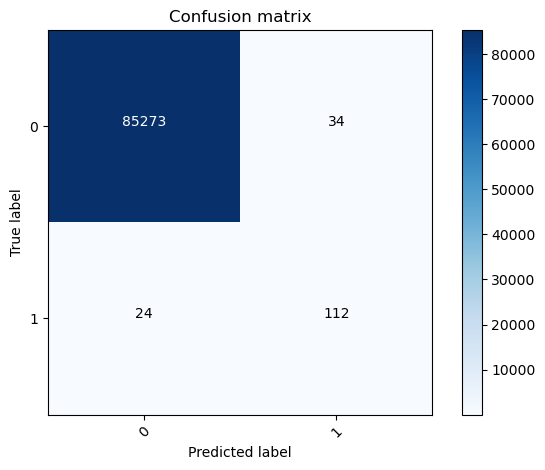

In [34]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [35]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [36]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)

results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721
1,DecisionTree,0.999321,0.176471,0.823529,0.767123,0.794326


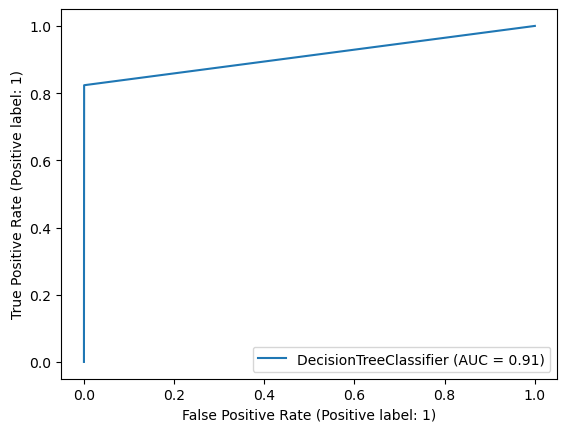

In [37]:
ROC_DT = RocCurveDisplay.from_estimator(decision_tree, X_test, y_test)
plt.show()

Confusion matrix, without normalization
[[284281     34]
 [    24    468]]


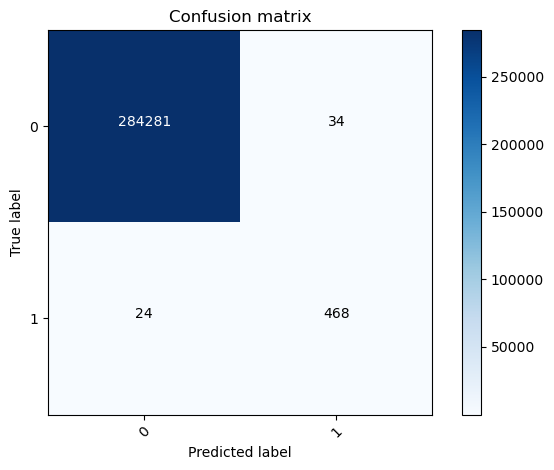

In [38]:
# Confusion matrix on the whole dataset
y_pred = decision_tree.predict(X)
cnf_matrix = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])


In [39]:
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [40]:
model_results = pd.DataFrame([['DecisionTree', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072
1,DecisionTree,0.999796,0.048780,0.951220,0.932271,0.941650


#### Neural Network models

In [41]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


##### We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 29 as input. This represents the information related to each transactions, ie each line with 29 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not fraudulent (0) or fraudulent (1).


#####  A dropout step is included to prevent overfitting.



In [42]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])

/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 5s 310us/step - accuracy: 0.9976 - loss: 0.0227
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 311us/step - accuracy: 0.9992 - loss: 0.0047
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 306us/step - accuracy: 0.9993 - loss: 0.0039
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 313us/step - accuracy: 0.9993 - loss: 0.0041
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 304us/step - accuracy: 0.9995 - loss: 0.0032


In [45]:
score = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step - accuracy: 0.9994 - loss: 0.0042


In [46]:
print(score)

[0.0032174556981772184, 0.9994382262229919]


##### The model achieves an accuracy of 99.94% ! Is this a good performance ?
    
##### Remember that our dataset is significantly composed of non fraudulent samples with only 172 fraudulent transactions per 100,000. 

##### Consequently, a model predicting every transaction as 'non fraudulent' would achieve 99.83% accuracy despite being unable to detect a single fraudulent case !



2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 209us/step
Test Data Accuracy: 0.9994


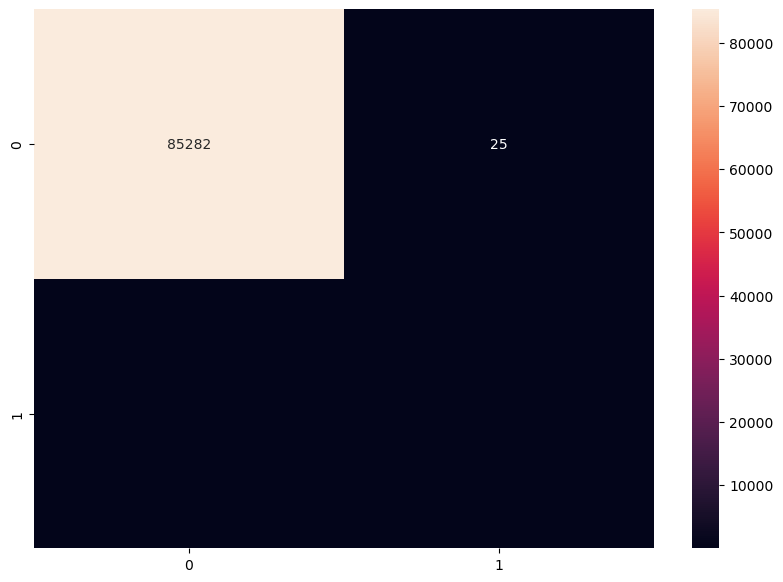

In [47]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



##### Detection of fraudulent transactions did not improve compared to the previous machine learning models.

    115 fraudulent transactions are detected as fraudulent by the model, yet 32 fraudulent transactions are not identified (false negative) which remains an issue. Our objective must be to detect as many fraudulent transactions as possible since these can have a huge negative impact.
    21 regular transactions are detected as potentially fraudulent by the model. These are false positive. This number is negligible.

##### Conclusion : We must find ways to further reduce the number of false negative.


In [48]:
# Alternative approach to plot confusion matrix (from scikit-learn.org site)
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)    # Pandas format required by confusion_matrix function

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 207us/step


In [49]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())   # y_pred.round() to convert probability to either 0 or 1 in line with y_test


In [50]:
print(cnf_matrix)

[[85282    25]
 [   23   113]]


Confusion matrix, without normalization
[[85282    25]
 [   23   113]]


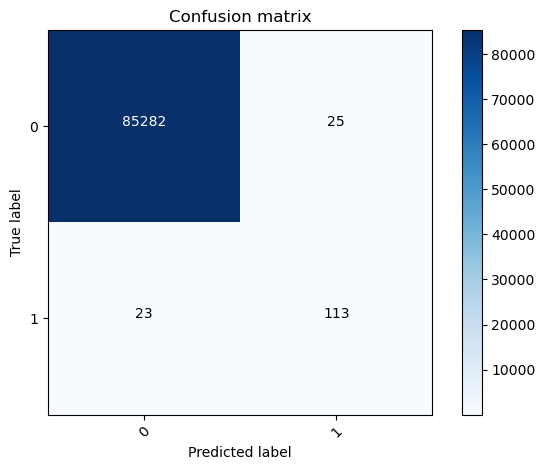

In [51]:
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

In [52]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [53]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721
1,DecisionTree,0.999321,0.176471,0.823529,0.767123,0.794326
2,PlainNeuralNetwork,0.999438,0.169118,0.830882,0.818841,0.824818


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 2s 201us/step
Confusion matrix, without normalization
[[284248     67]
 [    98    394]]


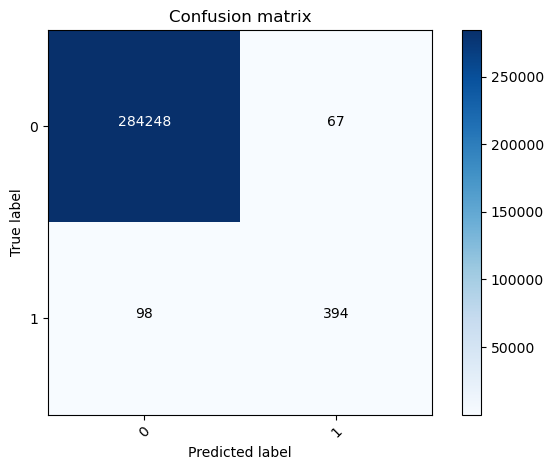

In [54]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [55]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())

In [56]:
model_results = pd.DataFrame([['PlainNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072
1,DecisionTree,0.999796,0.048780,0.951220,0.932271,0.941650
2,PlainNeuralNetwork,0.999421,0.199187,0.800813,0.854664,0.826863



##### Weighted loss to account for large class imbalance in train dataset

##### we will adjust the class imbalance by giving additional weight to the loss associated to errors made on fraudulent transaction detection. Let's review the process:

In [57]:
# Calculate class weights
y_train_list = y_train.tolist()  # Convert y_train to a list
unique_classes = []
for label in y_train_list:
    if label not in unique_classes:
        unique_classes.append(label)

total_count = len(y_train_list)
class_counts = []
for cls in unique_classes:
    count = y_train_list.count(cls)
    class_counts.append(count)

class_weights = []
for count, cls in zip(class_counts, unique_classes):
    weight = total_count / count
    class_weights.append((cls, weight))

In [58]:
class_weights

[([0], 1.0017888728091333), ([1], 560.0112359550562)]

In [59]:

class_weights_dict = {tuple(cls): weight for cls, weight in class_weights}

In [60]:
modified_class_weights_dict = {cls[0]: weight for cls, weight in class_weights_dict.items()}

In [61]:
modified_class_weights_dict

{0: 1.0017888728091333, 1: 560.0112359550562}

In [62]:
model.fit(X_train,y_train,batch_size=15,epochs=5, class_weight=modified_class_weights_dict, shuffle=True)

Epoch 1/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 320us/step - accuracy: 0.9971 - loss: 0.6722
Epoch 2/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 328us/step - accuracy: 0.9884 - loss: 0.9933
Epoch 3/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 5s 375us/step - accuracy: 0.9600 - loss: 1.0951
Epoch 4/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 337us/step - accuracy: 0.9697 - loss: 0.6271
Epoch 5/5
13291/13291 ━━━━━━━━━━━━━━━━━━━━ 4s 318us/step - accuracy: 0.9491 - loss: 0.7139


In [63]:
score_weighted = model.evaluate(X_test, y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 214us/step - accuracy: 0.9730 - loss: 0.0556


In [64]:
print(score_weighted)


[0.0549946092069149, 0.9722154140472412]


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 202us/step
Test Data Accuracy: 0.9722


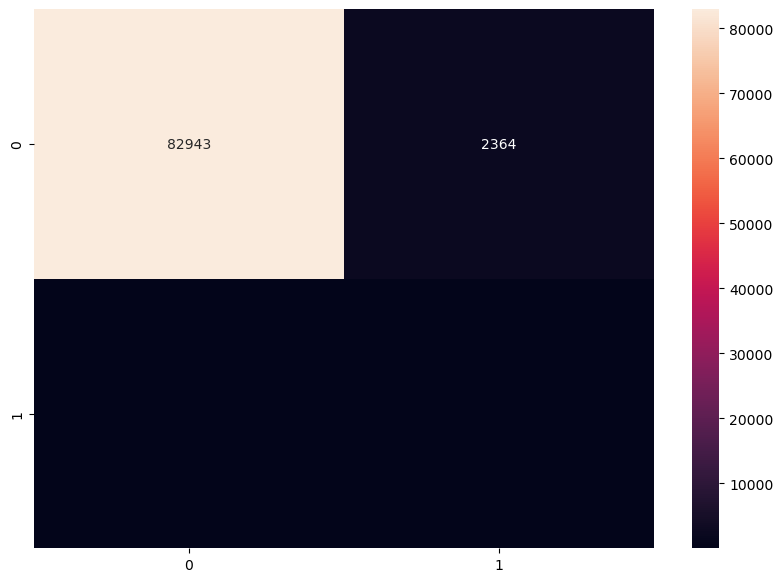

In [65]:
## Confusion Matrix on unseen test set
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
#sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



##### The accuracy reduced a bit. We need to look at more detailed evaluation measures like precision and recall to gauge the true model performance.

##### The model is actually much better at detecting fraudulent cases now. We have a lower False negative rate which is the key criteria for our purpose (detect a fraud when there is one).
    
##### But on the other hand, the model generates an excessive number of false positive compared to the previous approaches.



In [66]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [67]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721
1,DecisionTree,0.999321,0.176471,0.823529,0.767123,0.794326
2,PlainNeuralNetwork,0.999438,0.169118,0.830882,0.818841,0.824818
3,WeightedNeuralNetwork,0.972215,0.073529,0.926471,0.050602,0.095963


##### Although the recall metric improves, the F1-score collapses due to extremely poor precision. Given the very high number of transactions processed, the excessive number of false positives is clearly an issue.

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 2s 205us/step
Confusion matrix, without normalization
[[276398   7917]
 [    25    467]]


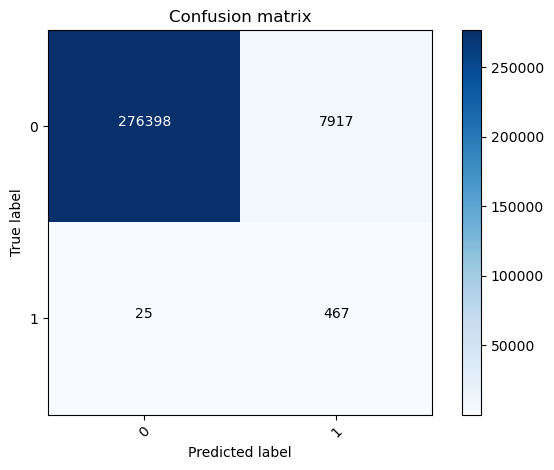

In [68]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [69]:
cc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())


In [70]:
model_results = pd.DataFrame([['WeightedNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072
1,DecisionTree,0.999796,0.048780,0.951220,0.932271,0.941650
2,PlainNeuralNetwork,0.999421,0.199187,0.800813,0.854664,0.826863
3,WeightedNeuralNetwork,0.972215,0.050813,0.949187,0.055701,0.105228



#### Undersampling

##### In order to balance the train set, another technique is undersampling. With this technique, we adjust the largest class to match the number of samples of the under-represented class. Here we want to randomly pick an amount of non-fraudulent transactions equal to the number of fraudulent transactions in the dataset.



In [71]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)


492


In [72]:
normal_indices = data[data.Class == 0].index

In [73]:
len(normal_indices)


284315

In [74]:


# Random select N indices from non fraudulent samples (N equals to number of fraudulent records)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))



492


In [75]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [76]:
under_sample_data = data.iloc[under_sample_indices,:]

In [77]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [79]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,341 (24.77 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,228 (16.52 KB)

In [81]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)


Epoch 1/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.9658 - loss: 0.3089 
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.9473 - loss: 0.3248
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.9602 - loss: 0.2287
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9521 - loss: 0.1923
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.9338 - loss: 0.2939


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion matrix, without normalization
[[137   9]
 [  4 146]]


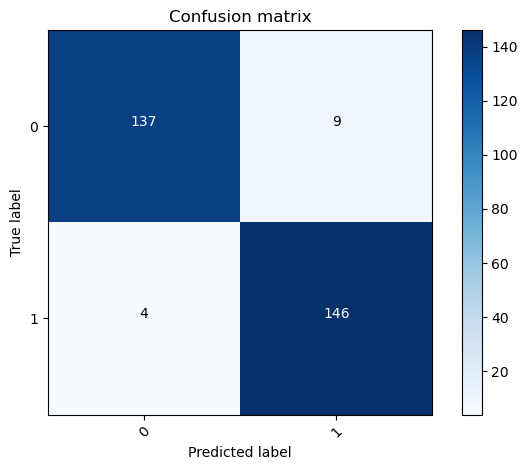

In [82]:


y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()



In [83]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [84]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset


,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721
1,DecisionTree,0.999321,0.176471,0.823529,0.767123,0.794326
2,PlainNeuralNetwork,0.999438,0.169118,0.830882,0.818841,0.824818
3,WeightedNeuralNetwork,0.972215,0.073529,0.926471,0.050602,0.095963
4,UnderSampledNeuralNetwork,0.956081,0.026667,0.973333,0.941935,0.957377


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 2s 209us/step
Confusion matrix, without normalization
[[267502  16813]
 [    14    478]]


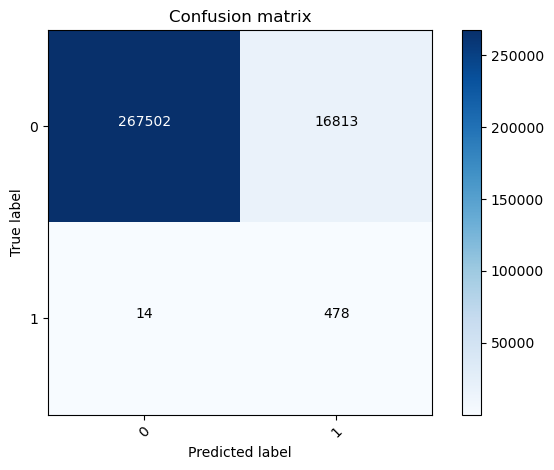

In [85]:


# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()



In [86]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())


In [87]:


model_results = pd.DataFrame([['UnderSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072
1,DecisionTree,0.999796,0.048780,0.951220,0.932271,0.941650
2,PlainNeuralNetwork,0.999421,0.199187,0.800813,0.854664,0.826863
3,WeightedNeuralNetwork,0.972215,0.050813,0.949187,0.055701,0.105228
4,UnderSampledNeuralNetwork,0.940918,0.028455,0.971545,0.027644,0.053759



##### Oversampling technique using SMOTE

##### (Synthetic Minority Oversample TEchnique)

#### the alternative to down-sampling is the upsampling of the minority class to the same level as the dominant one.
#### This can be achieved with the SMOTE method where a new vector is generated between 2 existing datapoints. Applying this technique allows to massively increase the number of fraudulent transactions


In [88]:
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train)

In [89]:
y_resample

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,

In [90]:
print('Number of total transactions before SMOTE upsampling: ', len(y), '...after SMOTE upsampling: ', len(y_resample))
print('Number of fraudulent transactions before SMOTE upsampling: ', len(y[y.Class==1]), 
      '...after SMOTE upsampling: ', np.sum(y_resample[y_resample==1]))


Number of total transactions before SMOTE upsampling:  284807 ...after SMOTE upsampling:  692
Number of fraudulent transactions before SMOTE upsampling:  492 ...after SMOTE upsampling:  346


In [91]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [93]:


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)



In [94]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),   # input of 29 columns as shown above
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(24,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),                        # binary classification fraudulent or not
])


/Users/a81060586/anaconda3/envs/nlp_gp/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)



Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.4908 - loss: 1.0856 
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.6256 - loss: 0.6181
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7046 - loss: 0.5425
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.7963 - loss: 0.4526
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9006 - loss: 0.3577


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Confusion matrix, without normalization
[[106   4]
 [ 10  88]]


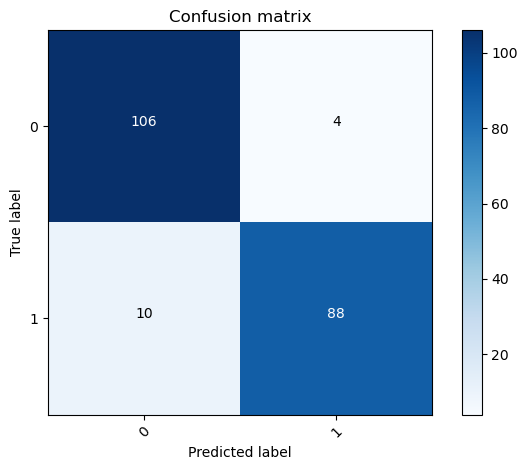

In [96]:


y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()



##### Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the unseen test set.

In [97]:
acc = accuracy_score(y_test, y_pred.round())
prec = precision_score(y_test, y_pred.round())
rec = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

In [98]:
### Store results in dataframe for comparing various Models
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_testset = pd.concat([results_testset, model_results], ignore_index=True)
results_testset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999649,0.161765,0.838235,0.934426,0.883721
1,DecisionTree,0.999321,0.176471,0.823529,0.767123,0.794326
2,PlainNeuralNetwork,0.999438,0.169118,0.830882,0.818841,0.824818
3,WeightedNeuralNetwork,0.972215,0.073529,0.926471,0.050602,0.095963
4,UnderSampledNeuralNetwork,0.956081,0.026667,0.973333,0.941935,0.957377
5,OverSampledNeuralNetwork,0.932692,0.102041,0.897959,0.956522,0.926316


8901/8901 ━━━━━━━━━━━━━━━━━━━━ 2s 230us/step
Confusion matrix, without normalization
[[276674   7641]
 [    56    436]]


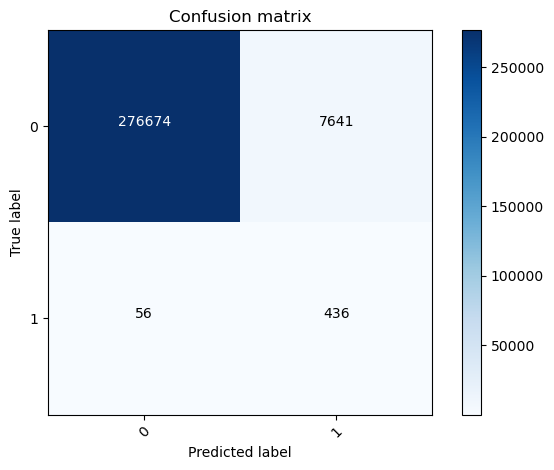

In [99]:
# Confusion matrix on the whole dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()



##### Notice the absence of False Negatives. The model is able to detect all fraudulent transactions on the full dataset.

##### Notice the limited number of False Positives which means a lot less verification work (on legitimate transactions) for the fraud departement



In [100]:
acc = accuracy_score(y, y_pred.round())
prec = precision_score(y, y_pred.round())
rec = recall_score(y, y_pred.round())
f1 = f1_score(y, y_pred.round())


In [101]:
model_results = pd.DataFrame([['OverSampledNeuralNetwork', acc, 1-rec, rec, prec, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
results_fullset = pd.concat([results_fullset, model_results], ignore_index=True)
results_fullset

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,RandomForest,0.999895,0.044715,0.955285,0.983264,0.969072
1,DecisionTree,0.999796,0.048780,0.951220,0.932271,0.941650
2,PlainNeuralNetwork,0.999421,0.199187,0.800813,0.854664,0.826863
3,WeightedNeuralNetwork,0.972215,0.050813,0.949187,0.055701,0.105228
4,UnderSampledNeuralNetwork,0.940918,0.028455,0.971545,0.027644,0.053759
5,OverSampledNeuralNetwork,0.972975,0.113821,0.886179,0.053980,0.101762
